In [15]:
from xml.etree.ElementTree import *
import re

In [4]:
file = 'example/PDF Card - 01-082-3446.xml'

In [63]:
import matplotlib.pyplot as plt

['322', '67', '352', '150', '534', '371', '11', '64', '309', '33', '321', '15', '97', '999', '18', '77', '4', '14', '100', '14', '2', '38', '115', '18', '113', '29', '14', '1', '97', '289', '101', '12', '11', '18', '15', '11', '8', '5', '60', '6', '2', '44', '321', '3', '3', '10m', 'm', '28', '1', '85m', 'm', '6', '49', '122', '55', '15', '35', '17', '4', '18', '5', '64', '13', '66m', 'm', '6', '1', '32', '55', '111', '4', '52', '1', '30', '37', '27', '77', '8m', 'm', '1', '8', '24m', 'm', '1', '11', '58', '12', '1', '15', '22', '10', '3m', 'm', '8', '2', '3', '7', '5m', 'm', '1', '8', '6m', 'm', '18m', 'm', '1', '17', '2', '31', '5', '26', '3', '16', '14m', 'm', '39', '4', '1', '3', '2', '1', '3', '3', '34m', 'm', '21', '7', '9m', 'm', '3', '3', '9m', 'm', '3', '2', '7', '4m', 'm', '1', '1', '6m', 'm', '22', '24', '11', '34m', 'm', '4', '7', '2', '3', '1', '1', '6m', 'm', '15', '7m', 'm', '1', '11', '1', '3', '3m', 'm', '8', '27m', 'm', '12', '11', '2', '2', '5', '12', '31m', 'm', '5m

(0.0, 1048.95)

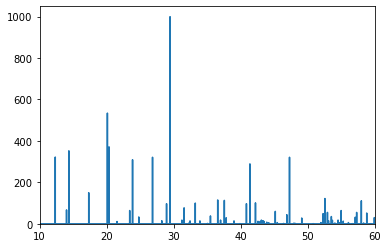

In [83]:
with open(file, mode = 'r') as f:
    content = f.read()#.replace('\n', '')
intensity = content[content.find('<stick_series'):content.find('</stick_series')]
print(re.findall('<intensity>(.*)</intensity>', intensity))

milli = 1 * 10 ** -3
def convert(s):
    if s == 'm':
        return milli
    elif 'm' in s:
        return int(s.replace('m', '')) * milli
    else:
        return int(s)
intensities = map(convert, re.findall('<intensity>(.*)</intensity>', intensity))
thetas = map(float, re.findall('<theta>(.*)</theta>', intensity))
diff = dict(zip(thetas, intensities))


start = 10
end = 60

thres = 0.0001
forgraph = [[start], [0]]
for k, theta in enumerate(diff):
    if theta < start:
        continue
    elif theta < end:
        forgraph[0].append(theta-thres)
        forgraph[1].append(0)
        forgraph[0].append(theta)
        forgraph[1].append(diff[theta])
        forgraph[0].append(theta+thres)
        forgraph[1].append(0)
    else:
        forgraph[0].append(end)
        forgraph[1].append(0)
        break
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(*forgraph)
ax.set_xlim(start, end)
ax.set_ylim(0, None)

In [87]:
import pandas as pd
df = pd.DataFrame(forgraph).T
df.columns = ['theta', 'intensity']
df

,theta,intensity
0,10.0000,0.0
1,12.3251,0.0
2,12.3252,322.0
3,12.3253,0.0
4,14.0072,0.0
...,...,...
210,59.4279,0.0
211,59.9771,0.0
212,59.9772,30.0
213,59.9773,0.0


In [89]:
df.to_csv('output.txt', encoding = 'utf_8_sig', index = False)